In [146]:
import matplotlib.pyplot as plt
import csv
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import datetime as dt
import math
import requests

In [147]:
data=pd.read_csv('StatewiseTestingDetails.csv')
data

Date                        State  TotalSamples Negative  Positive
0     2020-04-17  Andaman and Nicobar Islands        1403.0     1210      12.0
1     2020-04-24  Andaman and Nicobar Islands        2679.0      NaN      27.0
2     2020-04-27  Andaman and Nicobar Islands        2848.0      NaN      33.0
3     2020-05-01  Andaman and Nicobar Islands        3754.0      NaN      33.0
4     2020-05-16  Andaman and Nicobar Islands        6677.0      NaN      33.0
5     2020-05-19  Andaman and Nicobar Islands        6965.0      NaN      33.0
6     2020-05-20  Andaman and Nicobar Islands        7082.0      NaN      33.0
7     2020-05-21  Andaman and Nicobar Islands        7167.0      NaN      33.0
8     2020-05-22  Andaman and Nicobar Islands        7263.0      NaN      33.0
9     2020-05-23  Andaman and Nicobar Islands        7327.0      NaN      33.0
10    2020-05-24  Andaman and Nicobar Islands        7327.0      NaN      33.0
11    2020-05-25  Andaman and Nicobar Islands        7363.0      NaN      33.0
12    2020-05-26  Andaman and Nicobar Islands        7448.0      NaN      33.0
13    2020-05-27  Andaman and Nicobar Islands        7499.0      NaN      33.0
14    2020-05-28  Andaman and Nicobar Islands        7519.0      NaN      33.0
15    2020-05-29  Andaman and Nicobar Islands        7567.0      NaN      33.0
16    2020-05-30  Andaman and Nicobar Islands        7567.0      NaN      33.0
17    2020-05-31  Andaman and Nicobar Islands        7706.0      NaN      33.0
18    2020-06-01  Andaman and Nicobar Islands        7805.0      NaN      33.0
19    2020-06-02  Andaman and Nicobar Islands        8086.0      NaN      33.0
20    2020-06-03  Andaman and Nicobar Islands        8295.0      NaN      33.0
21    2020-06-04  Andaman and Nicobar Islands        8413.0      NaN      33.0
22    2020-06-05  Andaman and Nicobar Islands        8694.0      NaN      33.0
23    2020-06-06  Andaman and Nicobar Islands        9037.0      NaN      33.0
24    2020-06-07  Andaman and Nicobar Islands        9242.0      NaN      33.0
25    2020-06-08  Andaman and Nicobar Islands        9341.0      NaN      33.0
26    2020-06-09  Andaman and Nicobar Islands        9859.0      NaN      33.0
27    2020-06-10  Andaman and Nicobar Islands       10010.0      NaN      35.0
28    2020-06-11  Andaman and Nicobar Islands       10226.0      NaN      38.0
29    2020-06-12  Andaman and Nicobar Islands       10697.0      NaN      38.0
...          ...                          ...           ...      ...       ...
2851  2020-06-09                  West Bengal      287900.0      NaN    8985.0
2852  2020-06-10                  West Bengal      297419.0      NaN    9328.0
2853  2020-06-11                  West Bengal      306941.0      NaN    9768.0
2854  2020-06-12                  West Bengal      315699.0      NaN   10244.0
2855  2020-06-13                  West Bengal      324707.0      NaN   10698.0
2856  2020-06-14                  West Bengal      333733.0      NaN   11087.0
2857  2020-06-15                  West Bengal      343242.0      NaN   11494.0
2858  2020-06-16                  West Bengal      351754.0      NaN   11909.0
2859  2020-06-17                  West Bengal      360976.0      NaN   12300.0
2860  2020-06-18                  West Bengal      370291.0      NaN   12735.0
2861  2020-06-19                  West Bengal      380612.0      NaN   13090.0
2862  2020-06-20                  West Bengal      390942.0      NaN   13531.0
2863  2020-06-21                  West Bengal      401491.0      NaN   13945.0
2864  2020-06-22                  West Bengal      410854.0      NaN   14358.0
2865  2020-06-23                  West Bengal      420277.0      NaN   14728.0
2866  2020-06-24                  West Bengal      429766.0      NaN   15173.0
2867  2020-06-25                  West Bengal      439258.0      NaN   15648.0
2868  2020-06-26                  West Bengal      448795.0      NaN   16190.0
2869  2020-06-27                  West Bengal      458343.0   

In [148]:
%matplotlib inline
tn=data[data['State']=='Tamil Nadu']
tn["Date"] = pd.to_datetime(tn["Date"]).dt.strftime("%Y%m%d")


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [149]:
tn['Date']=tn['Date'].astype(int)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [150]:
tn=tn.drop(['State','TotalSamples','Negative'],axis=1)


In [151]:
tn=tn[tn['Date']>20200600]
for i in range(0,len(tn)+1):
    tn['Date'][i:i+1]=(i+1)**2
tn['Date']

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


2462       1
2463       4
2464       9
2465      16
2466      25
2467      36
2468      49
2469      64
2470      81
2471     100
2472     121
2473     144
2474     169
2475     196
2476     225
2477     256
2478     289
2479     324
2480     361
2481     400
2482     441
2483     484
2484     529
2485     576
2486     625
2487     676
2488     729
2489     784
2490     841
2491     900
2492     961
2493    1024
2494    1089
2495    1156
2496    1225
2497    1296
2498    1369
2499    1444
Name: Date, dtype: int32

In [152]:
tn

Date  Positive
2462     1   23495.0
2463     4   24586.0
2464     9   25872.0
2465    16   27256.0
2466    25   28694.0
2467    36   30152.0
2468    49   31667.0
2469    64   33229.0
2470    81   34914.0
2471   100   36841.0
2472   121   38716.0
2473   144   40698.0
2474   169   42687.0
2475   196   44661.0
2476   225   46504.0
2477   256   48019.0
2478   289   50193.0
2479   324   52334.0
2480   361   54449.0
2481   400   56845.0
2482   441   59377.0
2483   484   62087.0
2484   529   64603.0
2485   576   67468.0
2486   625   70977.0
2487   676   74622.0
2488   729   78335.0
2489   784   82275.0
2490   841   86224.0
2491   900   90167.0
2492   961   94049.0
2493  1024   98392.0
2494  1089  102721.0
2495  1156  107001.0
2496  1225  111151.0
2497  1296  114978.0
2498  1369  118594.0
2499  1444  122350.0

In [153]:
def updater(tn):
    req = requests.get('https://api.covidindiatracker.com/state_data.json')
    response=req.json()
    cases=response[1]['confirmed']
    date=(len(tn)+1)**2
    new_frame = pd.DataFrame([{'Date':date,"Positive":cases}])
    tn=pd.concat([tn,new_frame])
    return tn


In [154]:
tn=updater(tn)


In [155]:
tn

Date  Positive
2462     1   23495.0
2463     4   24586.0
2464     9   25872.0
2465    16   27256.0
2466    25   28694.0
2467    36   30152.0
2468    49   31667.0
2469    64   33229.0
2470    81   34914.0
2471   100   36841.0
2472   121   38716.0
2473   144   40698.0
2474   169   42687.0
2475   196   44661.0
2476   225   46504.0
2477   256   48019.0
2478   289   50193.0
2479   324   52334.0
2480   361   54449.0
2481   400   56845.0
2482   441   59377.0
2483   484   62087.0
2484   529   64603.0
2485   576   67468.0
2486   625   70977.0
2487   676   74622.0
2488   729   78335.0
2489   784   82275.0
2490   841   86224.0
2491   900   90167.0
2492   961   94049.0
2493  1024   98392.0
2494  1089  102721.0
2495  1156  107001.0
2496  1225  111151.0
2497  1296  114978.0
2498  1369  118594.0
2499  1444  122350.0
0     1521  130261.0

In [156]:
tn

Date  Positive
2462     1   23495.0
2463     4   24586.0
2464     9   25872.0
2465    16   27256.0
2466    25   28694.0
2467    36   30152.0
2468    49   31667.0
2469    64   33229.0
2470    81   34914.0
2471   100   36841.0
2472   121   38716.0
2473   144   40698.0
2474   169   42687.0
2475   196   44661.0
2476   225   46504.0
2477   256   48019.0
2478   289   50193.0
2479   324   52334.0
2480   361   54449.0
2481   400   56845.0
2482   441   59377.0
2483   484   62087.0
2484   529   64603.0
2485   576   67468.0
2486   625   70977.0
2487   676   74622.0
2488   729   78335.0
2489   784   82275.0
2490   841   86224.0
2491   900   90167.0
2492   961   94049.0
2493  1024   98392.0
2494  1089  102721.0
2495  1156  107001.0
2496  1225  111151.0
2497  1296  114978.0
2498  1369  118594.0
2499  1444  122350.0
0     1521  130261.0

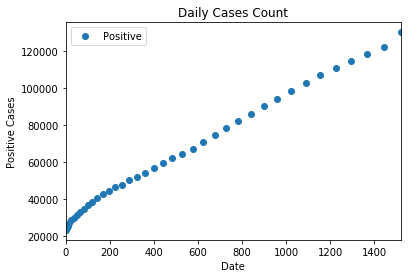

In [157]:
tn.plot(x='Date', y='Positive', style='o')
plt.title('Daily Cases Count')
plt.xlabel('Date')
plt.ylabel('Positive Cases')
plt.show()

In [158]:
X = tn.iloc[:, :-1].values
y = tn.iloc[:, 1].values

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [160]:

model = linear_model.LinearRegression().fit(X_train,y_train)

In [161]:
model.intercept_

28987.5906444218

In [162]:
y_pred=model.predict(X_test)

In [163]:
pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

Actual      Predicted
0   28694.0   30659.540419
1   86224.0   85231.981055
2   90167.0   89177.782522
3  107001.0  106298.548212
4  111151.0  110913.129589
5   74622.0   74197.112544
6   38716.0   37079.827552
7   64603.0   64366.047870

In [164]:
tamilnadu=data[data['State']=='Tamil Nadu']
print(tamilnadu[tamilnadu['Date']=='2020-07-02'])
print(tamilnadu[tamilnadu['Date']=='2020-07-01'])

            Date       State  TotalSamples Negative  Positive
2493  2020-07-02  Tamil Nadu     1235692.0      NaN   98392.0
            Date       State  TotalSamples Negative  Positive
2492  2020-07-01  Tamil Nadu     1202204.0      NaN   94049.0


In [186]:
# Prediction for 2020-07-04
prediction=math.ceil(model.predict([[40**2]]))
print("Estimated Covid-19 cases is {}".format(prediction))

Estimated Covid-19 cases is 135993


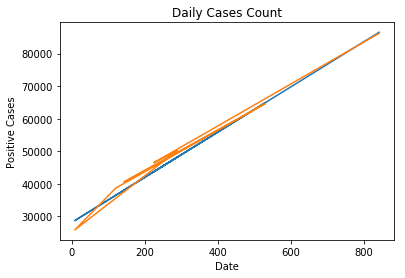

In [20]:
plt.plot(X_test,y_pred) # blue line
plt.plot(X_test,y_test) # orange line
plt.title('Daily Cases Count')
plt.xlabel('Date')
plt.ylabel('Positive Cases')
plt.show()

 We have this algorithm as a website: https://covid19predict.herokuapp.com

In [181]:
from datetime import date
current=dt.datetime.now()
y=int(current.strftime("%Y"))
m=int(current.strftime("%m"))
d=int(current.strftime("%d"))
f_date = date(2020, 6, 1)
l_date = date(y, m, d)
delta = l_date - f_date
delta.days


39


In [185]:
import math
fetched=tn[len(tn)-1:len(tn)]['Date']
final_row=int(math.sqrt(fetched))

39